In [438]:
#%run GT4agent_Astar_Dijkstra.ipynb
%run GT4RandGridenv.ipynb
%run GT4vis.ipynb

In [439]:

import matplotlib.pyplot as plt
import numpy as np


In [440]:
import heapq

def dijkstra_search(grid, start, goal):
    neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    gscore = {start: 0}

    while open_set:
        current_cost, current = heapq.heappop(open_set)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            return path[::-1]

        for dx, dy in neighbors:
            neighbor = current[0] + dx, current[1] + dy
            if 0 <= neighbor[0] < len(grid) and 0 <= neighbor[1] < len(grid[0]) and grid[neighbor[0]][neighbor[1]] == 1:
                tentative_g_score = current_cost + 1
                if tentative_g_score < gscore.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    gscore[neighbor] = tentative_g_score
                    heapq.heappush(open_set, (tentative_g_score, neighbor))

    return []  # No path found

In [441]:
def translate_step_to_action(current_position, next_step):
    dx, dy = next_step[0] - current_position[0], next_step[1] - current_position[1]

    # Validate if the step is valid (either 1 step horizontally or vertically)
    if abs(dx) > 1 or abs(dy) > 1 or (dx != 0 and dy != 0):
        # If the step is more than 1 unit or diagonal, it's invalid
        return None

    # Translate valid steps into actions
    if dx == 1 and dy == 0:  # Moving right
        return 0
    elif dx == 0 and dy == 1:  # Moving up
        return 1
    elif dx == -1 and dy == 0:  # Moving left
        return 2
    elif dx == 0 and dy == -1:  # Moving down
        return 3

    # If reached here, it's an unexpected case, return None
    return None

Skipping invalid step from (3, 5) to (3, 7)
Skipping invalid step from (3, 5) to (4, 7)
Skipping invalid step from (3, 5) to (5, 7)
Skipping invalid step from (3, 5) to (5, 8)
Skipping invalid step from (3, 5) to (6, 8)
Skipping invalid step from (3, 5) to (7, 8)
Skipping invalid step from (3, 5) to (8, 8)
Skipping invalid step from (3, 5) to (9, 8)
Skipping invalid step from (3, 5) to (9, 9)
Skipping invalid step from (3, 5) to (9, 10)
Skipping invalid step from (3, 5) to (9, 11)
Skipping invalid step from (3, 5) to (8, 11)
Skipping invalid step from (3, 5) to (8, 12)


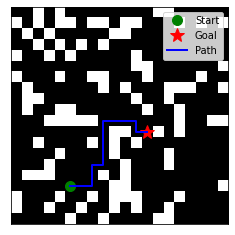

In [444]:
# Initialize the environment
env = RandGridWorldEnv(size=20)
env.reset()

start = tuple(env._agent_location)
goal = tuple(env._target_location)
path = dijkstra_search(env._grid, start, goal)

# Simulate the agent's movement
# Simulate the agent's movement
for next_step in path[1:]:
    action = translate_step_to_action(env._agent_location, next_step)
    if action is not None:
        state, reward, done, info = env.step(action)
        
        # env.render()  # Optionally render the environment at each step
    else:
        print(f"Skipping invalid step from {env._agent_location} to {next_step}")

visualize5(env._grid, path, start, goal)
env.close()  # Close the environment when done